# Module 2, Activity 5: Visualising 2-Dimensional Continuous Data

For visualising potential relationsips between 2-dimensional continuous variables, the scatter plot is the first place to start. In Python, scatter plots are available through pretty much all visualisation libraries, from base Matplotlib to Seaborn to Pandas.plot. Here, we're going to use Matplotlib.

In [33]:
# import packages/libraries
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime

# load (and optionally format) dataset
df = pd.read_csv("data/taxis.csv")
df["pickup"] = pd.to_datetime(df["pickup"])
df["dropoff"] = pd.to_datetime(df["dropoff"])

Before we start, we are going to create a new column of data, the duration in minutes of each trip.

In [34]:
duration = df["dropoff"]-df["pickup"] #calculating trip duration as timedelta datatype
df["duration_min"] = duration.dt.total_seconds()/60 #converting to minutes and adding to df

If we look at our dataset, we'll see we've added a new variable at the end called "duration_min".

In [35]:
df

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,duration_min
0,2019-03-23 20:21:00,2019-03-23 20:27:00,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,6.0
1,2019-03-04 16:11:00,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,8.0
2,2019-03-27 17:53:00,2019-03-27 18:00:00,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,7.0
3,2019-03-10 01:23:00,2019-03-10 01:49:00,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,26.0
4,2019-03-30 13:27:00,2019-03-30 13:37:00,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:00,2019-03-31 09:55:00,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan,4.0
6429,2019-03-31 17:38:00,2019-03-31 18:34:00,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx,56.0
6430,2019-03-23 22:55:00,2019-03-23 23:14:00,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn,19.0
6431,2019-03-04 10:09:00,2019-03-04 10:14:00,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn,5.0


Now, let's begin plotting with something easy. Let's explore the relationship between the distance travelled and the fare total.

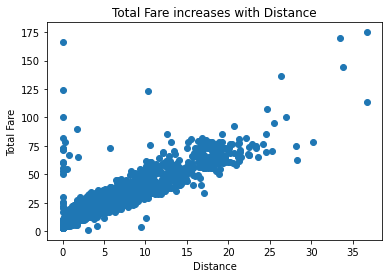

In [36]:
fix, ax = plt.subplots()
ax.scatter(df.distance, df.total) # Plot points
ax.set_xlabel("Distance") # X-axis label
ax.set_ylabel("Total Fare") # Y-axis label
ax.set_title("Total Fare increases with Distance") # Useful/interesting title
plt.show() # Command to show plot

**Exercise:** Edit the axis labels in the figure above to include the units for Distance (km) and Total Fare ($).

What if we wanted to distinguish between payment types? We could use colours to do this. First, we need to split our datasets, then plot two scatter plots on the same axes.

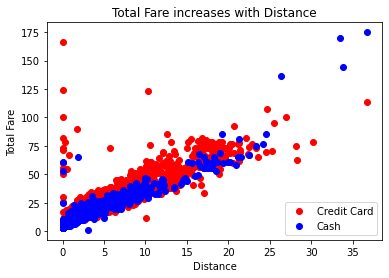

In [37]:
df_card = df[df.payment == "credit card"]
df_cash = df[df.payment == "cash"]

fig, ax = plt.subplots()
ax.scatter(df_card.distance, df_card.total, c = "r")
ax.scatter(df_cash.distance, df_cash.total, c = "b")
ax.set_xlabel("Distance")
ax.set_ylabel("Total Fare")
ax.set_title("Total Fare increases with Distance")
ax.legend(["Credit Card", "Cash"])
plt.show()

**Exercises:** 
1) Explore the relationship between the trip distance and its duration, but distinguish between the the different payment types.\
2) We can also distinguish between groups by point type. The default is filled round circles as above, but we could also change their size or their style. Using Matplotlib's [marker style guide](https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers) as a starting point, create a scatter plot of distance versus fare, but use different markers to distinguish the two groups.\
3) Sometimes the default legend position can obscure some of our observations. Fortunately, this isn't the case here, but we need to know how to move the legend around the figure in case it is a problem. Using Matplotlib's [legend documentation](https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html). as a starting point, move the legend from the bottom right corner of the axes using the **loc** argument, to a) the top left hand corner of the plot and b) on the right hand side of the plot (outside the axes). Also, add a useful title to the legend.\
4) What if we wanted to truncate our x and y-axes? Using Matplotlob's [axis documentation](https://matplotlib.org/stable/api/axes_api.html) as a starting point, truncate our x-axis to go from 0 to 5 and our y-axis from 30 to 175. \
5) From our original figure of distance and total fare, and the truncated figure we created in Exercise 4, we see very high fares for little or no distance travelled. In your own words, explain what might have caused these data points. **HINT:** Were these travellers prepared when their taxi arrived to collect them? We'll look more at unexpected values in a later Module.

We can see from our figure above that total fare increases with distance travelled in a pretty linear way. This isn't very surprising. But, there's more to this data than what this single figure can show. For example, what if we wanted to colour the points by the time of day? We could subset our data into fares during peak traffic hour (7.30am - 9.30am and 4.30pm to 6.30pm) and off-peak hours. Maybe we're interested in looking at this, as well as how the distance versus fare relationship differs by payment type. For this, we could plot two axes on the same figure. Let's do this now.\

First, we need to subset our data into peak and off-peak travel times. We'll use the pickup time variable for this.

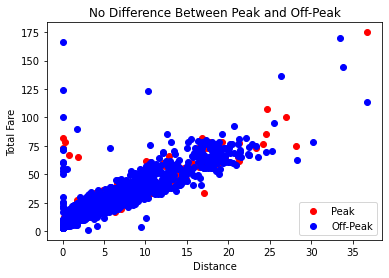

In [38]:
## Create datetime start and finish times for the two peak periods, 
# for more information about datetime.strptime, 
# see here: https://www.geeksforgeeks.org/python-datetime-strptime-function/.
peakstart1 = datetime.strptime("07" + "30" + "00", "%H%M%S").time() 
peakstart2 = datetime.strptime("16" + "30" + "00", "%H%M%S").time()

peakend1 = datetime.strptime("09" + "30" + "00", "%H%M%S").time() 
peakend2 = datetime.strptime("18" + "30" + "00", "%H%M%S").time() 

# Extract time of day from datetime pickup object (we don't want the date)
df["pickup_time"] = df["pickup"].dt.time 

# Create a boolean variable called peak, which is True when pickup time is within peak hours, and False when it isn't.
df["peak"] = (((df.pickup_time >= peakstart1) & (df.pickup_time <= peakend1)) | # Peak time one, note the | symbol, this means 'or'. So we're searching for times in peak time one OR peak time two
              ((df.pickup_time >= peakstart2) & (df.pickup_time <= peakend2))) # Peak time two

df_peak = df[df.peak == True] # Subset of our dataset, with peak time pickups only
df_offpeak = df[df.peak == False] # Subset of our dataset, with off-peak pickups only

fig, ax = plt.subplots()
ax.scatter(df_peak.distance, df_peak.total, c = "r")
ax.scatter(df_offpeak.distance, df_offpeak.total, c = "b")
ax.set_xlabel("Distance")
ax.set_ylabel("Total Fare")
ax.set_title("No Difference Between Peak and Off-Peak")
ax.legend(["Peak", "Off-Peak"])
plt.show()


So, we don't really see a difference between distance travelled and total fare between peak and off-peak times after all. But, the off-peak points are obscuring most of the peak points, how do we deal with this? One way is to create seperate axes for the peak and offpeak scatterplots. This is easy with Pyplot, we just need to specify each plot's position in our figure.

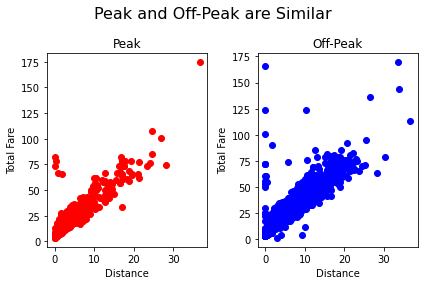

In [39]:
fig, axs = plt.subplots(1,2) # A figure with one row and two columns of axes

# Our first plot, note Python indexes from 0
axs[0].scatter(df_peak.distance, df_peak.total, c = "r")
axs[0].set_xlabel("Distance")
axs[0].set_ylabel("Total Fare")
axs[0].set_title("Peak")

# Our second plot
axs[1].scatter(df_offpeak.distance, df_offpeak.total, c = "b")
axs[1].set_xlabel("Distance")
axs[1].set_ylabel("Total Fare")
axs[1].set_title("Off-Peak")

# Figure aesthetics
plt.suptitle('Peak and Off-Peak are Similar', fontsize=16) # Main title
plt.tight_layout() # Shortcut to arrange figures without overlap (try without this)
plt.show() # Show plot command

**Exercise:** 
1) Change the positioning of the subplots above, so that instead of a single row and two columns, you have a single column and two rows. \
2) Create scatter plots to explore the relationship between distance travelled and total fare during the day (06.00am - 06.00pm) and during the night (06.00pm - 06.00am). Plot those in a figure with two rows, where the first row differentiates distanced travelled and total fare by peak and off-peak times.